Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from cmdstanpy import install_cmdstan
install_cmdstan()
from cmdstanpy import CmdStanModel
import cmdstanpy
import os

df = pd.read_csv('sample_response_times.csv', sep=';')

data = {
    'N': len(df),
    'y': df['rt'].values,
    'condition': df['condition'].values.astype(int),
    'choice': df['choice'].values.astype(int)
}

DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


CmdStan install directory: /root/.cmdstan
CmdStan version 2.36.0 already installed
Test model compilation


Completed stan model

In [19]:
stan_code = """
data {
    int<lower=1> N;
    array[N] real<lower=0> y;
    array[N] int<lower=1, upper=2> condition;
    array[N] int<lower=0, upper=1> choice;
}
parameters {
    // Your code here
    real<lower=0> alpha;           // Boundary separation
    real<lower=0> tau;             // Non-decision time
    real<lower=0, upper=1> beta;   // Starting point bias
    real drift_cond1;              // Drift rate for condition 1
    real drift_cond2;              // Drift rate for condition 2
}
model {
    // Priors
    // Your code here
    alpha ~ normal(1, 0.5)T[0,];   // Boundary separation
    tau ~ normal(0.3, 0.2)T[0,];   // Non-decision time
    beta ~ beta(2, 2);             // Starting point bias
    drift_cond1 ~ normal(0, 2);    // Drift rate for condition 1
    drift_cond2 ~ normal(0, 2);    // Drift rate for condition 2

    // Likelihood
    for (n in 1:N) {
        // Condition 1
        if (condition[n] == 1) {
            if (choice[n] == 1) {
                 // Your code here
                 target += wiener_lpdf(y[n] | alpha, tau, beta, drift_cond1);
            }
            else {
                 // Your code here
                 target += wiener_lpdf(y[n] | alpha, tau, 1-beta, -drift_cond1);
            }
        }
        // Condition 2
        if (condition[n] == 2) {
            if (choice[n] == 1) {
                // Your code here
                target += wiener_lpdf(y[n] | alpha, tau, beta, drift_cond2);
            }
            else {
                 // Your code here
                 target += wiener_lpdf(y[n] | alpha, tau, 1-beta, -drift_cond2);
            }
        }
    }
}
generated quantities {
    // Calculate the absolute difference between drift rates
    real drift_diff = abs(drift_cond1 - drift_cond2);
}
"""

# Write the model to a file
with open('diffusion_model.stan', 'w') as f:
    f.write(stan_code)

Run and sample from posterier

In [20]:
model = CmdStanModel(stan_file='diffusion_model.stan')

fit = model.sample(
    data=data,
    iter_warmup=1000,
    iter_sampling=1000,
    chains=4,
    seed=42,
    show_console=False
)

DEBUG:cmdstanpy:Removing /content/diffusion_model
02:02:41 - cmdstanpy - INFO - compiling stan file /content/diffusion_model.stan to exe file /content/diffusion_model
INFO:cmdstanpy:compiling stan file /content/diffusion_model.stan to exe file /content/diffusion_model
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=diffusion_model.stan /content/diffusion_model
cwd: /root/.cmdstan/cmdstan-2.36.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=diffusion_model.stan --o=/content/diffusion_model.hpp /content/diffusion_model.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I s

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/diffusion_model', 'id=1', 'random', 'seed=42', 'data', 'file=/tmp/tmp56tsm6ve/1vtgsr4p.json', 'output', 'file=/tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/diffusion_model', 'id=2', 'random', 'seed=42', 'data', 'file=/tmp/tmp56tsm6ve/1vtgsr4p.json', 'output', 'file=/tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_2.csv', 'method=sample', 'num_samples=1000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/diffusion_model', 'id=3', 'random', 'seed=42', 'data', 'file=/tmp/tmp56tsm6ve/1vtgsr4p.json', 'ou

02:03:37 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/diffusion_model', 'id=1', 'random', 'seed=42', 'data', 'file=/tmp/tmp56tsm6ve/1vtgsr4p.json', 'output', 'file=/tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_1.csv
 console_msgs (if any):
	/tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gam

Summarize results in text and display convergance. Notice that the values come out close to 1 here (very good)


In [ ]:

summary = fit.summary()
print("\nParameter Estimates:")
print(summary.loc[['alpha', 'tau', 'beta', 'drift_cond1', 'drift_cond2', 'drift_diff']])

# Convergence stats for the problem
print("\nConvergence Diagnostics:")
rhat_values = summary['R_hat'].values
print(f"R-hat values: Min={min(rhat_values):.4f}, Max={max(rhat_values):.4f}")

DEBUG:cmdstanpy:cmd: /root/.cmdstan/cmdstan-2.36.0/bin/stansummary --percentiles= 5,50,95 --sig_figs=6 --csv_filename=/tmp/tmp56tsm6ve/stansummary-diffusion_model-5fepgq5t.csv /tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_1.csv /tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_2.csv /tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_3.csv /tmp/tmp56tsm6ve/diffusion_modelaevkz3ye/diffusion_model-20250320020259_4.csv
cwd: None



Parameter Estimates:
                 Mean      MCSE    StdDev       MAD        5%       50%  \
alpha        0.848087  0.000499  0.026056  0.026104  0.807205  0.847173   
tau          0.397109  0.000058  0.002839  0.002799  0.392229  0.397316   
beta         0.520216  0.000444  0.021215  0.022012  0.485784  0.520223   
drift_cond1  2.576760  0.004669  0.258962  0.257676  2.156440  2.580190   
drift_cond2  0.327365  0.004214  0.225803  0.231953 -0.046801  0.326951   
drift_diff   2.249400  0.004795  0.307165  0.299389  1.744750  2.249920   

                  95%  ESS_bulk  ESS_tail    R_hat  
alpha        0.892472   2780.00   2524.98  1.00032  
tau          0.401350   2570.14   2565.88  1.00119  
beta         0.554323   2321.15   3088.76  1.00067  
drift_cond1  3.008170   3091.88   2933.20  1.00094  
drift_cond2  0.700126   2903.92   2998.40  1.00044  
drift_diff   2.752950   4183.66   2702.16  1.00122  

Convergence Diagnostics:
R-hat values: Min=1.0003, Max=1.0021


Some plots to help us figure out the correct answer

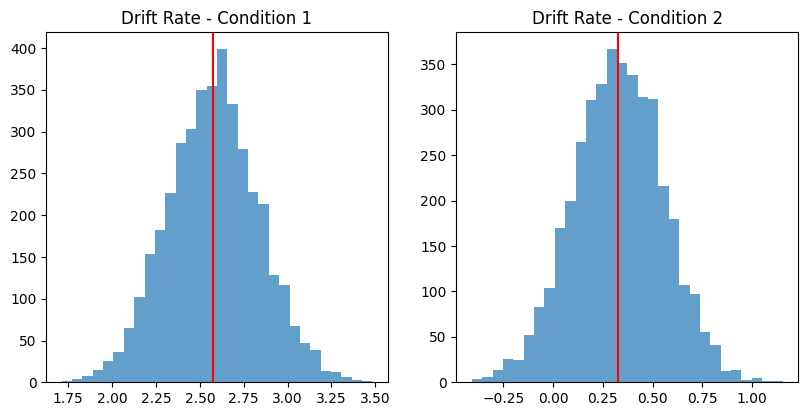

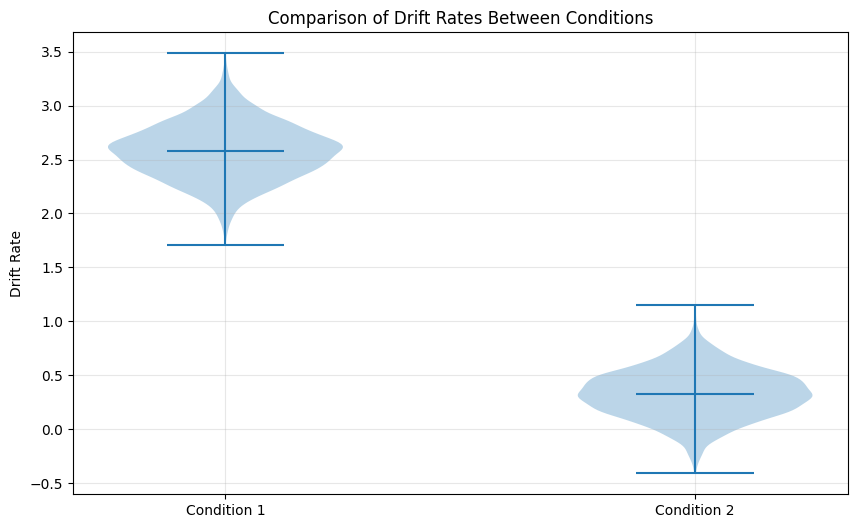

In [ ]:
posterior = fit.stan_variables()

# Create plots
plt.figure(figsize=(15, 10))

# Plot post distrubtions
plt.subplot(2, 3, 1)
plt.hist(posterior['drift_cond1'], bins=30, alpha=0.7)
plt.axvline(x=np.mean(posterior['drift_cond1']), color='red')
plt.title('Drift Rate - Condition 1')

plt.subplot(2, 3, 2)
plt.hist(posterior['drift_cond2'], bins=30, alpha=0.7)
plt.axvline(x=np.mean(posterior['drift_cond2']), color='red')
plt.title('Drift Rate - Condition 2')

# Plot to compare drift rates (notice how 1 is so much higher)
plt.figure(figsize=(10, 6))
plt.violinplot([posterior['drift_cond1'], posterior['drift_cond2']], showmeans=True)
plt.xticks([1, 2], ['Condition 1', 'Condition 2'])
plt.ylabel('Drift Rate')
plt.title('Comparison of Drift Rates Between Conditions')
plt.grid(True, alpha=0.3)
plt.savefig('drift_comparison.png')
plt.show()

Calculations between drift rates



Probability that Condition 1 has higher drift rate: 1.0000
Probability that Condition 2 has higher drift rate: 0.0000


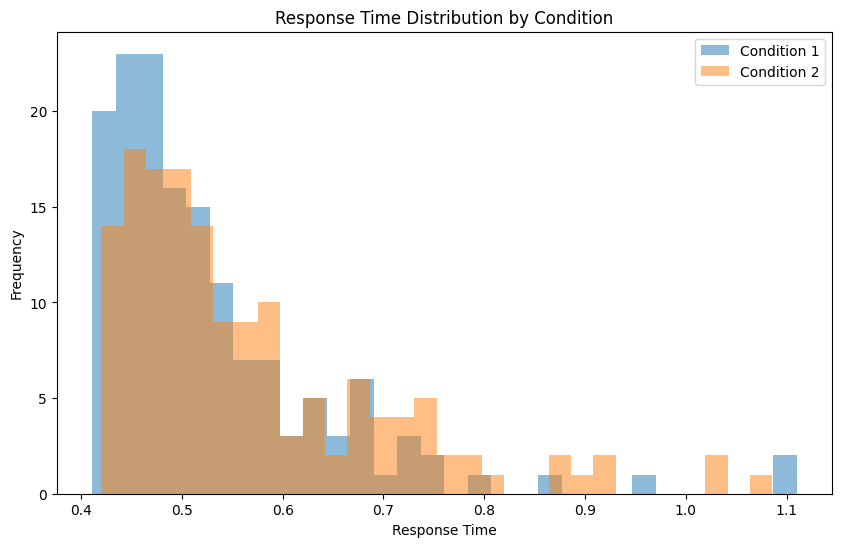


Accuracy in Condition 1: 0.9267
Accuracy in Condition 2: 0.5867


In [28]:
prob_cond1_greater = np.mean(posterior['drift_cond1'] > posterior['drift_cond2'])
print(f"\nProbability that Condition 1 has higher drift rate: {prob_cond1_greater:.4f}")
print(f"Probability that Condition 2 has higher drift rate: {1-prob_cond1_greater:.4f}")

# Analyzing response time by condition
rt_cond1 = df[df['condition'] == 1]['rt']
rt_cond2 = df[df['condition'] == 2]['rt']

plt.figure(figsize=(10, 6))
plt.hist(rt_cond1, bins=30, alpha=0.5, label='Condition 1')
plt.hist(rt_cond2, bins=30, alpha=0.5, label='Condition 2')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.legend()
plt.title('Response Time Distribution by Condition')
plt.savefig('rt_distribution.png')
plt.show()

# Accuracy comparison
acc_cond1 = df[df['condition'] == 1]['choice'].mean()
acc_cond2 = df[df['condition'] == 2]['choice'].mean()

print(f"\nAccuracy in Condition 1: {acc_cond1:.4f}")
print(f"Accuracy in Condition 2: {acc_cond2:.4f}")